## Basic EDA

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [2]:
df=pd.read_csv('Reviews.csv',index_col='Id')

In [3]:
df.head(5)

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
Id,,,,,,,,,
1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
df_row,df_column=df.shape
print('Amazon Fine Food review dataset has {} rows and {} columns.'.format(df_row,df_column))
df.info()

Amazon Fine Food review dataset has 568454 rows and 9 columns.
<class 'pandas.core.frame.DataFrame'>
Int64Index: 568454 entries, 1 to 568454
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   ProductId               568454 non-null  object
 1   UserId                  568454 non-null  object
 2   ProfileName             568438 non-null  object
 3   HelpfulnessNumerator    568454 non-null  int64 
 4   HelpfulnessDenominator  568454 non-null  int64 
 5   Score                   568454 non-null  int64 
 6   Time                    568454 non-null  int64 
 7   Summary                 568427 non-null  object
 8   Text                    568454 non-null  object
dtypes: int64(4), object(5)
memory usage: 43.4+ MB


In [5]:
column_list=df.columns.to_list()
print('Unique values in each column')
for column in column_list:
    print(column,": ",df[column].nunique())

Unique values in each column
ProductId :  74258
UserId :  256059
ProfileName :  218416
HelpfulnessNumerator :  231
HelpfulnessDenominator :  234
Score :  5
Time :  3168
Summary :  295742
Text :  393579


5    63.88
4    14.19
1     9.19
3     7.50
2     5.24
Name: Score, dtype: float64


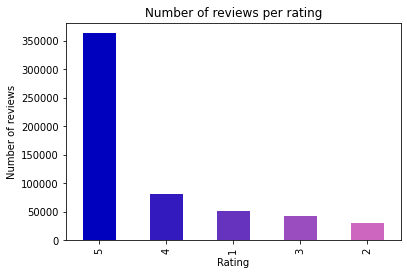

In [6]:
from itertools import cycle, islice
my_colors = [(x/5.0, x/10.0, 0.75) for x in range(len(df))]

df['Score'].value_counts().plot.bar(title='Number of reviews per rating', color=my_colors)
plt.xlabel('Rating')
plt.ylabel('Number of reviews')
print((df['Score'].value_counts(normalize=True)*100).round(2))

In [7]:
five_star_revs=df[df['Score'] == 5]

In [8]:
five_star_revs["Summary"].head(10)

Id
1                                 Good Quality Dog Food
5                                           Great taffy
7         Great!  Just as good as the expensive brands!
8                                Wonderful, tasty taffy
9                                            Yay Barley
10                                     Healthy Dog Food
11                      The Best Hot Sauce in the World
12    My cats LOVE this "diet" food better than thei...
15                         Strawberry Twizzlers - Yummy
16             Lots of twizzlers, just what you expect.
Name: Summary, dtype: object

In [9]:
four_star_revs=df[df['Score'] == 4]
four_star_revs["Summary"].head(10)

Id
3                                 "Delight" says it all
6                                            Nice Taffy
14                                    fresh and greasy!
28                          Great Bargain for the Price
33                         Best of the Instant Oatmeals
34                                         Good Instant
36                                           satisfying
39                        GOOD WAY TO START THE DAY....
49    Very good but next time I won't order the Vari...
53             You'll go nuts over Ass-Kickin' Peanuts.
Name: Summary, dtype: object

In [10]:
four_star_revs=df[df['Score'] == 3]
four_star_revs["Summary"].head(30)

Id
46                                        Hearty Oatmeal
48                                                 Mushy
50                                            Same stuff
54                                        not ass kickin
61                       Better price for this at Target
69     How much would you pay for a bag of chocolate ...
79                            Order only in cold weather
84                         Natural Balance Lamb and Rice
85                             INCREASED MY DOGS ITCHING
107                                        disappointing
130                                            It burns!
145                                           Bite sized
149                                              Ehhh...
162                           Not the greatest tasting..
170                        Banana Heads Not Banana Runts
183                      Great product to help you sleep
190                                              It's ok
198                         

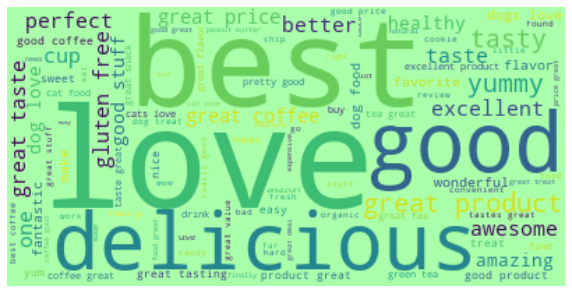

In [11]:
from wordcloud import WordCloud,STOPWORDS

pos_rev=df[df['Score']>3]
pos_rev_texts=[]
for x in pos_rev['Summary']:
     pos_rev_texts.append(x)
pos_rev_text=(' ').join(str(x) for x in pos_rev_texts).lower()
plt.figure(figsize=(10,10))
pos_rev_cloud=WordCloud(max_words=100,stopwords=set(STOPWORDS),random_state=None,background_color='#aaffaa').generate(pos_rev_text)
plt.imshow(pos_rev_cloud,interpolation='bilinear')
plt.axis('off')
plt.show()

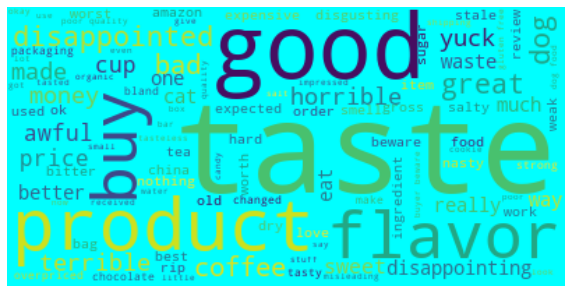

In [12]:
neg_rev=df[df['Score']<3]
neg_rev_texts=[]
for x in neg_rev['Summary']:
    neg_rev_texts.append(x)
neg_rev_text=(' ').join(str(x) for x in neg_rev_texts).lower()
plt.figure(figsize=(10,10))
neg_rev_cloud=WordCloud(max_words=100,stopwords=set(STOPWORDS),random_state=None,background_color='cyan').generate(neg_rev_text)
plt.imshow(neg_rev_cloud,interpolation='bilinear')
plt.axis('off')
plt.show()

<AxesSubplot:xlabel='Score'>

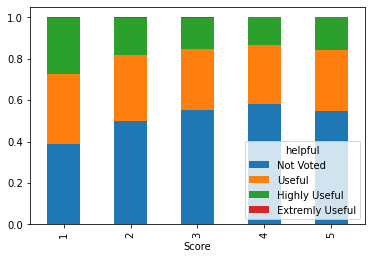

In [13]:
bins=[-0.5,0.5,2,100,1000]
group=['Not Voted','Useful','Highly Useful', 'Extremly Useful']
df['helpful']=pd.cut(df['HelpfulnessNumerator'],bins,labels=group)
helpfulness=pd.crosstab(df['Score'],df['helpful'])
helpfulness.div(helpfulness.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)

## A deeper look to expressions

In [14]:
pos_rev_texts[:10]

['Good Quality Dog Food',
 '"Delight" says it all',
 'Great taffy',
 'Nice Taffy',
 'Great!  Just as good as the expensive brands!',
 'Wonderful, tasty taffy',
 'Yay Barley',
 'Healthy Dog Food',
 'The Best Hot Sauce in the World',
 'My cats LOVE this "diet" food better than their regular food']

In [15]:
neg_rev_texts[:10]

['Not as Advertised',
 'Cough Medicine',
 'My Cats Are Not Fans of the New Food',
 'poor taste',
 'Nasty No flavor',
 "Don't like it",
 'stale product.',
 'Taste is not so good.',
 'Warning!  WARNING!  -ALCOHOL SUGARS!',
 'nothing special']

In [16]:
pos_revs=[]
for x in pos_rev['Text']:
     pos_revs.append(x)

In [17]:
pos_revs[:5]

['I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.',
 'This is a confection that has been around a few centuries.  It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar.  And it is a tiny mouthful of heaven.  Not too chewy, and very flavorful.  I highly recommend this yummy treat.  If you are familiar with the story of C.S. Lewis\' "The Lion, The Witch, and The Wardrobe" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch.',
 'Great taffy at a great price.  There was a wide assortment of yummy taffy.  Delivery was very quick.  If your a taffy lover, this is a deal.',
 'I got a wild hair for taffy and ordered this five pound bag. The taffy

In [18]:
neg_revs=[]
for x in neg_rev['Text']:
     neg_revs.append(x)

In [19]:
neg_revs[:5]

['Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".',
 'If you are looking for the secret ingredient in Robitussin I believe I have found it.  I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda.  The flavor is very medicinal.',
 "My cats have been happily eating Felidae Platinum for more than two years. I just got a new bag and the shape of the food is different. They tried the new food when I first put it in their bowls and now the bowls sit full and the kitties will not touch the food. I've noticed similar reviews related to formula changes in the past. Unfortunately, I now need to find a new food that my cats will eat.",
 'I love eating them and they are good for watching TV and looking at movies! It is not too sweet. I like to transfer them to a zip lock baggie so they stay fresh so I can take 

In [20]:
pr = json.dumps(pos_revs, ensure_ascii=False)

with open("pos_revs.json", "w") as f:
    f.write(pr)
    
nr = json.dumps(neg_revs, ensure_ascii=False)

with open("neg_revs.json", "w") as f:
    f.write(nr)

## Further dive into vocab

In [21]:
import spacy
nlp = spacy.load("en_core_web_md")

2022-05-24 15:51:28.644264: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/usr/local/lib:/usr/local/lib/fst:/usr/local/lib:/usr/local/lib
2022-05-24 15:51:28.644356: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
/usr/local/lib/python3.8/dist-packages/spacy-3.2.1-py3.8-linux-x86_64.egg/spacy/util.py:833: UserWarning: [W095] Model 'en_core_web_md' (3.1.0) was trained with spaCy v3.1 and may not be 100% compatible with the current version (3.2.1). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [22]:
doc = nlp("I recommend there knowing you'll fall in love with these delicious, crispy snacks.")

for token in doc:
    print(token)

I
recommend
there
knowing
you
'll
fall
in
love
with
these
delicious
,
crispy
snacks
.


In [23]:
[token for token in doc if not token.is_punct]

[I,
 recommend,
 there,
 knowing,
 you,
 'll,
 fall,
 in,
 love,
 with,
 these,
 delicious,
 crispy,
 snacks]

In [24]:
from collections import Counter
vocab = Counter()

for sent in pos_revs[:2000]:
    sent = sent.replace("<br />", " ").replace("<a", " ").replace("<a/>", " ")
    doc = nlp(sent)
    tokens = [token.lemma_.lower() for token in doc if not (token.is_punct or token.like_url or token.is_stop)]
    vocab.update(tokens)

In [25]:
vocab.most_common(300)

[(' ', 3910),
 ('good', 1010),
 ('chip', 870),
 ('like', 863),
 ('flavor', 845),
 ('love', 742),
 ('great', 735),
 ('taste', 695),
 ('product', 564),
 ('try', 537),
 ('bag', 508),
 ('buy', 493),
 ('find', 469),
 ('food', 450),
 ('eat', 409),
 ('tea', 367),
 ('coffee', 335),
 ('order', 321),
 ('price', 316),
 ('time', 310),
 ('amazon', 283),
 ('use', 279),
 ('dog', 263),
 ('store', 255),
 ('well', 251),
 ('potato', 247),
 ('mix', 241),
 ('little', 236),
 ('brand', 234),
 ('salt', 234),
 ('favorite', 225),
 ('recommend', 224),
 ('add', 224),
 ('pack', 222),
 ('snack', 220),
 ('sugar', 204),
 ('get', 203),
 ('come', 198),
 ('think', 198),
 ('year', 197),
 ('delicious', 189),
 ('healthy', 188),
 ('day', 187),
 ('sweet', 182),
 ('drink', 181),
 ('look', 180),
 ('calorie', 178),
 ('purchase', 176),
 ('box', 175),
 ('want', 174),
 ('make', 170),
 ('go', 168),
 ('water', 162),
 ('know', 159),
 ('enjoy', 157),
 ('cup', 156),
 ('2', 155),
 ('easy', 152),
 ('small', 148),
 ('bit', 146),
 ('fat', 

In [26]:
nvocab = Counter()

for sent in neg_revs[:2000]:
    sent = sent.replace("<br />", " ").replace("<a", " ").replace("<a/>", " ")
    doc = nlp(sent)
    tokens = [token.lemma_.lower() for token in doc if not (token.is_punct or token.like_url or token.is_stop)]
    nvocab.update(tokens)

In [27]:
nvocab.most_common(300)

[(' ', 4615),
 ('taste', 1105),
 ('like', 1087),
 ('product', 1027),
 ('buy', 763),
 ('flavor', 727),
 ('good', 613),
 ('try', 613),
 ('coffee', 604),
 ('food', 472),
 ('order', 431),
 ('think', 421),
 ('eat', 396),
 ('bag', 394),
 ('cup', 387),
 ('time', 368),
 ('bad', 360),
 ('find', 353),
 ('box', 337),
 ('amazon', 336),
 ('tea', 333),
 ('drink', 326),
 ('dog', 317),
 ('love', 303),
 ('get', 299),
 ('know', 297),
 ('water', 296),
 ('purchase', 290),
 ('look', 288),
 ('sugar', 285),
 ('well', 279),
 ('$', 273),
 ('review', 266),
 ('go', 259),
 ('brand', 254),
 ('ingredient', 251),
 ('chocolate', 243),
 ('want', 242),
 ('mix', 237),
 ('use', 232),
 ('chip', 228),
 ('price', 224),
 ('way', 222),
 ('little', 222),
 ('great', 214),
 ('come', 204),
 ('item', 198),
 ('package', 196),
 ('pack', 194),
 ('say', 192),
 ('store', 191),
 ('hot', 191),
 ('give', 190),
 ('treat', 189),
 ('open', 186),
 ('juice', 178),
 ('thing', 177),
 ('receive', 177),
 ('add', 177),
 ('money', 175),
 ('free', 17

In [ ]:
pv = json.dumps(vocab, ensure_ascii=False)

with open("pos_vocab.json", "w") as f:
    f.write(pv)
    
nv = json.dumps(nvocab, ensure_ascii=False)

with open("neg_vocab.json", "w") as f:
    f.write(nv)

# Noun chunks, adjectives and verbs

In [28]:
doc = nlp("I hated this cracker, it has an awful taste")

In [29]:
for token in doc:
    print(token, token.pos_, token.tag_)

I PRON PRP
hated VERB VBD
this DET DT
cracker NOUN NN
, PUNCT ,
it PRON PRP
has VERB VBZ
an DET DT
awful ADJ JJ
taste NOUN NN


In [30]:
from collections import Counter
counter =Counter()

for sent in pos_revs[:500]:
    sent = sent.replace("<br />", " ").replace("<a", " ").replace("<a/>", " ")
    doc = nlp(sent)
    adjs = [token.text.lower() for token in doc if token.pos_ == "ADJ"]
    counter.update(adjs)
    

In [31]:
counter.most_common(100)

[('great', 172),
 ('good', 168),
 ('other', 107),
 ('best', 88),
 ('little', 50),
 ('more', 49),
 ('better', 45),
 ('delicious', 44),
 ('hot', 42),
 ('perfect', 42),
 ('sweet', 42),
 ('many', 39),
 ('fresh', 38),
 ('favorite', 36),
 ('natural', 35),
 ('only', 33),
 ('small', 33),
 ('free', 31),
 ('nice', 30),
 ('local', 30),
 ('much', 29),
 ('spicy', 29),
 ('few', 28),
 ('tasty', 28),
 ('regular', 28),
 ('wonderful', 27),
 ('excellent', 26),
 ('crunchy', 26),
 ('strong', 25),
 ('easy', 24),
 ('big', 24),
 ('sure', 23),
 ('first', 23),
 ('hard', 22),
 ('bad', 22),
 ('full', 22),
 ('most', 21),
 ('right', 21),
 ('real', 20),
 ('thick', 20),
 ('same', 20),
 ('happy', 20),
 ('whole', 20),
 ('salty', 20),
 ('healthy', 19),
 ('less', 19),
 ('high', 19),
 ('tangy', 19),
 ('expensive', 18),
 ('amazing', 18),
 ('several', 17),
 ('worth', 17),
 ('-', 17),
 ('instant', 17),
 ('organic', 17),
 ('low', 17),
 ('different', 17),
 ('cheaper', 17),
 ('available', 16),
 ('large', 16),
 ('enough', 16),
 

In [32]:
ncounter =Counter()

for sent in neg_revs[:500]:
    sent = sent.replace("<br />", " ").replace("<a", " ").replace("<a/>", " ")
    doc = nlp(sent)
    adjs = [token.text.lower() for token in doc if token.pos_ == "ADJ"]
    ncounter.update(adjs)

In [33]:
ncounter.most_common(100)

[('good', 133),
 ('other', 121),
 ('more', 77),
 ('bad', 69),
 ('little', 64),
 ('same', 61),
 ('better', 53),
 ('different', 49),
 ('much', 49),
 ('great', 49),
 ('disappointed', 45),
 ('best', 39),
 ('first', 37),
 ('new', 36),
 ('many', 36),
 ('real', 36),
 ('few', 36),
 ('free', 33),
 ('hot', 32),
 ('small', 31),
 ('hard', 31),
 ('high', 31),
 ('old', 30),
 ('most', 29),
 ('big', 29),
 ('sweet', 26),
 ('full', 25),
 ('expensive', 25),
 ('awful', 25),
 ('sure', 24),
 ('regular', 24),
 ('local', 23),
 ('natural', 22),
 ('salty', 22),
 ('only', 21),
 ('terrible', 20),
 ('sour', 20),
 ('fresh', 19),
 ('strong', 19),
 ('white', 19),
 ('own', 19),
 ('nasty', 19),
 ('stale', 18),
 ('least', 18),
 ('low', 18),
 ('whole', 18),
 ('favorite', 18),
 ('clear', 18),
 ('long', 18),
 ('worst', 18),
 ('iced', 18),
 ('worth', 18),
 ('less', 17),
 ('healthy', 17),
 ('cheaper', 17),
 ('fine', 17),
 ('tiny', 16),
 ('plastic', 16),
 ('weak', 16),
 ('such', 16),
 ('-', 16),
 ('bland', 16),
 ('alive', 16)

#### Noun chunks

In [34]:
doc = nlp("It has a creamy consistency and is very very smooth drink.")

ADV* ADJ* (NOUN|PRON)

NOUN
ADJ NOUN
ADV ADJ NOUN

In [35]:
list(doc.noun_chunks)

[It, a creamy consistency, very very smooth drink]

In [36]:
doc = nlp("It is a very smooth and fresh drink.")

In [37]:
list(doc.noun_chunks)

[It, a very smooth and fresh drink]

In [38]:
from spacy import displacy

In [39]:
displacy.render(doc, style="dep", jupyter=True)

In [40]:
pos_noun_chunks = []

for sent in pos_revs[:500]:
    sent = sent.replace("<br />", " ").replace("<a", " ").replace("<a/>", " ")
    doc = nlp(sent)
    chnks = list(doc.noun_chunks)
    chnks = [chunk.text for chunk in chnks if chunk[0].pos_ not in ["PRON", "NOUN", "PROPN"]]
    pos_noun_chunks += list(chnks)
    

In [41]:
pos_noun_chunks

['the Vitality',
 'canned dog food products',
 'good quality',
 'The product',
 'a stew',
 'a processed meat',
 'this product',
 'a confection',
 'around a few centuries',
 'a light, pillowy citrus gelatin',
 'this case',
 'tiny squares',
 'powdered sugar',
 'a tiny mouthful',
 'this yummy treat',
 'the story',
 'The Witch',
 'The Wardrobe',
 'the treat',
 'the Witch',
 'Great taffy',
 'a great price',
 'a wide assortment',
 'yummy taffy',
 'a deal',
 'a wild hair',
 'this five pound bag',
 'The taffy',
 'many flavors',
 'a bit too much red/black licorice-flavored pieces',
 'just not my particular favorites',
 'this brand',
 'a delightful treat',
 'This saltwater taffy',
 'great flavors',
 'Each candy',
 'the candies',
 'the expensive version',
 'this candy',
 'a beach-themed party',
 'This taffy',
 'The flavors',
 'the grass',
 'a very healthy dog food',
 'small puppies',
 'every feeding',
 'the cactus',
 'the tequila',
 'just the unique combination',
 'the flavour',
 'this hot sauce'

In [42]:
neg_noun_chunks = []

for sent in neg_revs[:500]:
    sent = sent.replace("<br />", " ").replace("<a", " ").replace("<a/>", " ")
    doc = nlp(sent)
    chnks = list(doc.noun_chunks)
    chnks = [chunk.text for chunk in chnks if chunk[0].pos_ not in ["PRON", "NOUN", "PROPN"]]
    neg_noun_chunks += list(chnks)

In [43]:
neg_noun_chunks

['the peanuts',
 'an error',
 'the vendor',
 'the product',
 '"Jumbo',
 'the secret ingredient',
 'the Root Beer Extract',
 'some cherry soda',
 'The flavor',
 'more than two years',
 'a new bag',
 'the shape',
 'the food',
 'the new food',
 'the bowls',
 'the kitties',
 'the food',
 'similar reviews',
 'the past',
 'a new food',
 'a zip lock baggie',
 'The candy',
 'No flavor',
 'Just  plan',
 'This oatmeal',
 'the way',
 '6 days',
 'the 6 bags',
 'the Mango flavor',
 'no hint',
 'a hint',
 'various sports nutrition products',
 'the taste',
 'the products',
 'The mango flavor',
 'the bad taste',
 'This sweetener',
 'an alcohol sugar',
 'the body',
 'a short time',
 'the extreme intestinal bloating',
 'massive amounts',
 'a person',
 'the sugar-free chocolates',
 'first taste',
 'the bliss',
 'the terrible side effects',
 'The discomfort',
 'a balloon',
 'very painful abdominal cramping',
 'the symptoms',
 'a low calorie sweetener',
 'the culprit',
 'all symptoms',
 'the chocolate',
 '

### Verbs

In [44]:
doc = nlp("It was great, I might love it.")

In [45]:
for token in doc:
    print(token, token.pos_, token.tag_)

It PRON PRP
was AUX VBD
great ADJ JJ
, PUNCT ,
I PRON PRP
might AUX MD
love VERB VB
it PRON PRP
. PUNCT .


In [46]:
vcounter =Counter()

for sent in pos_revs[:500]:
    sent = sent.replace("<br />", " ").replace("<a", " ").replace("<a/>", " ")
    doc = nlp(sent)
    verbs = [token.lemma_.lower() for token in doc if token.pos_ == "VERB"]
    vcounter.update(verbs)

In [47]:
vcounter.most_common(100)

[('be', 526),
 ('have', 340),
 ('love', 157),
 ('buy', 139),
 ('get', 127),
 ('use', 121),
 ('try', 118),
 ('eat', 114),
 ('make', 114),
 ('like', 114),
 ('find', 112),
 ('taste', 93),
 ('go', 89),
 ('do', 68),
 ('recommend', 60),
 ('give', 59),
 ('think', 52),
 ('order', 50),
 ('add', 49),
 ('take', 47),
 ('drink', 46),
 ('say', 45),
 ('know', 43),
 ('look', 42),
 ('come', 41),
 ('want', 37),
 ('enjoy', 37),
 ('work', 35),
 ('keep', 30),
 ('see', 30),
 ('seem', 27),
 ('put', 26),
 ('open', 25),
 ('need', 24),
 ('purchase', 24),
 ('cook', 22),
 ('arrive', 21),
 ('help', 21),
 ('save', 21),
 ('start', 19),
 ('feel', 19),
 ('flavor', 18),
 ('serve', 17),
 ('tell', 17),
 ('run', 17),
 ('wish', 17),
 ('live', 16),
 ('share', 15),
 ('bring', 14),
 ('expect', 14),
 ('carry', 14),
 ('stop', 14),
 ('cut', 13),
 ('mean', 13),
 ('burn', 13),
 ('happen', 12),
 ('pick', 12),
 ('break', 12),
 ('decide', 12),
 ('believe', 12),
 ('last', 11),
 ('become', 11),
 ('miss', 11),
 ('prepare', 11),
 ('leave

In [48]:
nvcounter =Counter()

for sent in neg_revs[:500]:
    sent = sent.replace("<br />", " ").replace("<a", " ").replace("<a/>", " ")
    doc = nlp(sent)
    verbs = [token.lemma_.lower() for token in doc if token.pos_ == "VERB"]
    nvcounter.update(verbs)

In [49]:
nvcounter.most_common(100)

[('be', 694),
 ('have', 352),
 ('buy', 177),
 ('try', 170),
 ('make', 161),
 ('get', 154),
 ('taste', 142),
 ('use', 131),
 ('eat', 122),
 ('say', 108),
 ('go', 106),
 ('think', 100),
 ('order', 99),
 ('find', 91),
 ('like', 91),
 ('do', 89),
 ('look', 86),
 ('know', 84),
 ('love', 74),
 ('give', 73),
 ('want', 70),
 ('come', 66),
 ('open', 59),
 ('take', 57),
 ('purchase', 56),
 ('drink', 55),
 ('receive', 53),
 ('need', 49),
 ('see', 45),
 ('throw', 39),
 ('sell', 37),
 ('seem', 37),
 ('add', 36),
 ('put', 34),
 ('contain', 33),
 ('read', 32),
 ('feed', 30),
 ('recommend', 30),
 ('expect', 30),
 ('tell', 29),
 ('pay', 26),
 ('enjoy', 26),
 ('believe', 25),
 ('notice', 25),
 ('feel', 25),
 ('work', 23),
 ('break', 23),
 ('ship', 23),
 ('return', 23),
 ('keep', 23),
 ('change', 23),
 ('cook', 22),
 ('start', 22),
 ('call', 22),
 ('pop', 22),
 ('arrive', 21),
 ('consider', 20),
 ('send', 20),
 ('hope', 20),
 ('waste', 19),
 ('stick', 19),
 ('leave', 18),
 ('stay', 17),
 ('let', 17),
 ('